In [17]:
import pandas as pd

# Load the CSV file
file_path = "dataset\spotify_songs.csv"  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Sort the songs by track popularity in descending order
sorted_data = data.sort_values(by="track_popularity", ascending=False)
print(len(sorted_data))
# Select the top 100 most popular songs
top_100_songs = sorted_data.head(100)

# Drop duplicates
top_100_songs = top_100_songs.drop_duplicates(subset=["track_id"])
print(len(top_100_songs))


32833
18


In [18]:
import pandas as pd
# Calculer le nombre de track_id uniques
unique_track_ids = data['track_id'].nunique()

# Afficher le résultat
print(f"Nombre de track_id uniques : {unique_track_ids}")


Nombre de track_id uniques : 28356


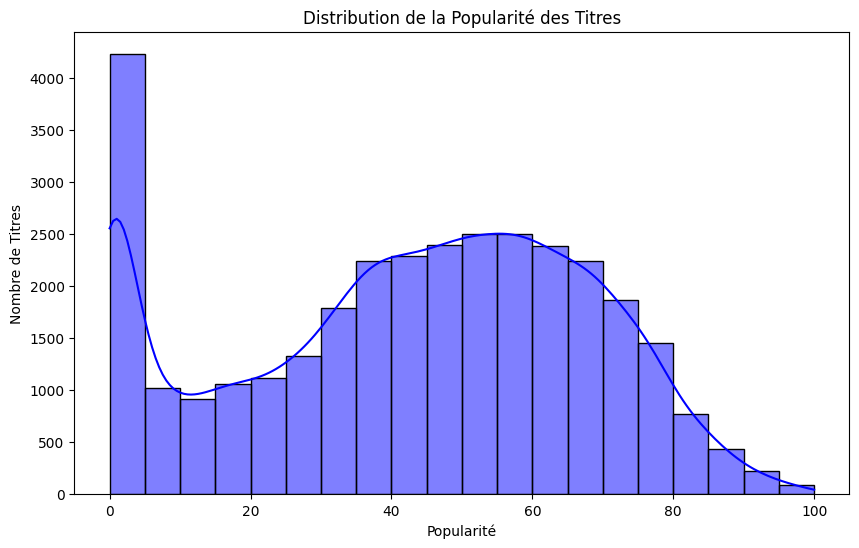

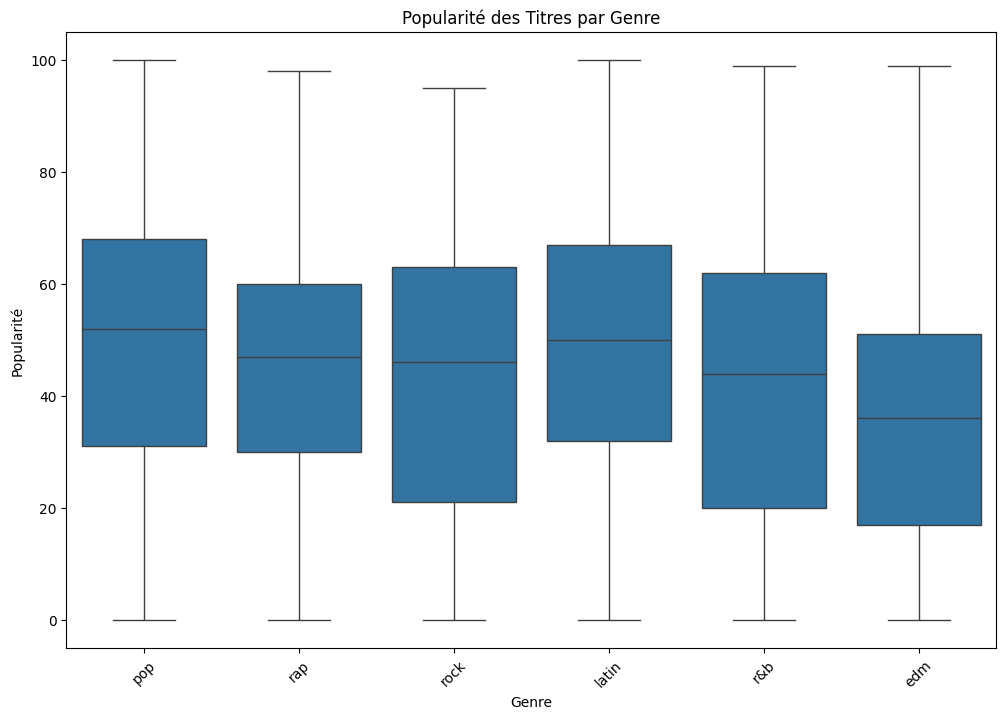

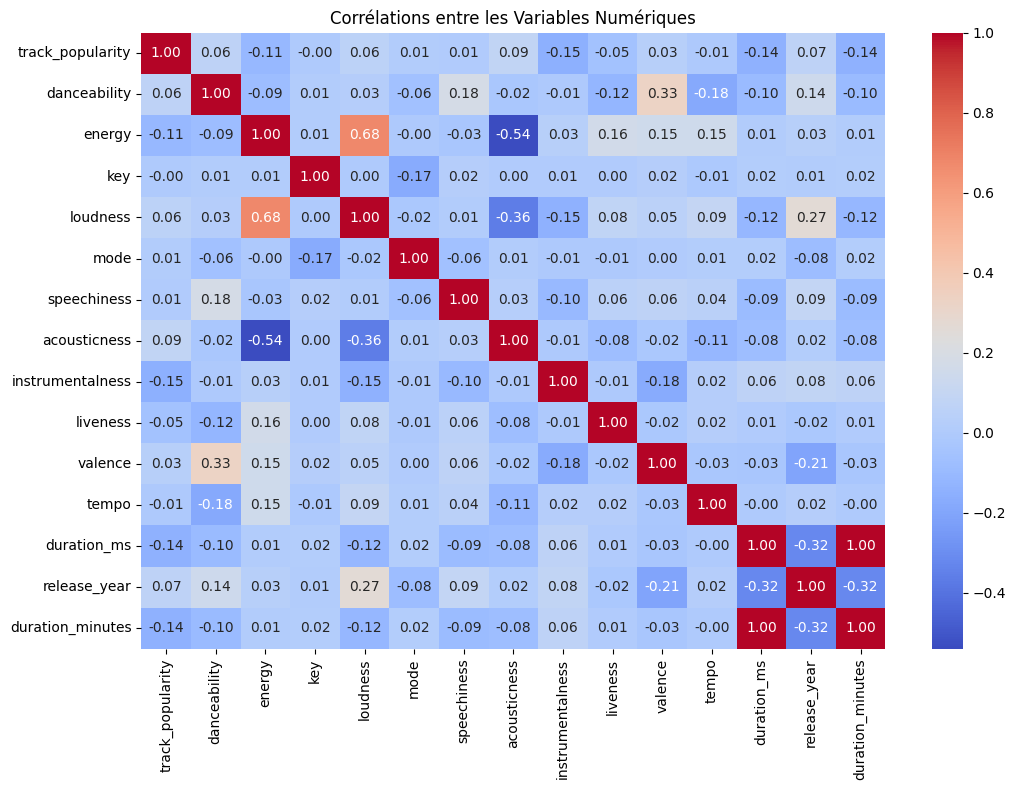

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('dataset\spotify_songs.csv')

# Convertir en datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Ajouter des colonnes dérivées
df['release_year'] = df['track_album_release_date'].dt.year
df['duration_minutes'] = df['duration_ms'] / 60000

# Distribution de la popularité
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution de la Popularité des Titres')
plt.xlabel('Popularité')
plt.ylabel('Nombre de Titres')
plt.show()

# Popularité par Genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')
plt.title('Popularité des Titres par Genre')
plt.xlabel('Genre')
plt.ylabel('Popularité')
plt.xticks(rotation=45)
plt.show()

# Filtrer les colonnes numériques
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation uniquement sur les colonnes numériques
corr_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélations entre les Variables Numériques')
plt.show()

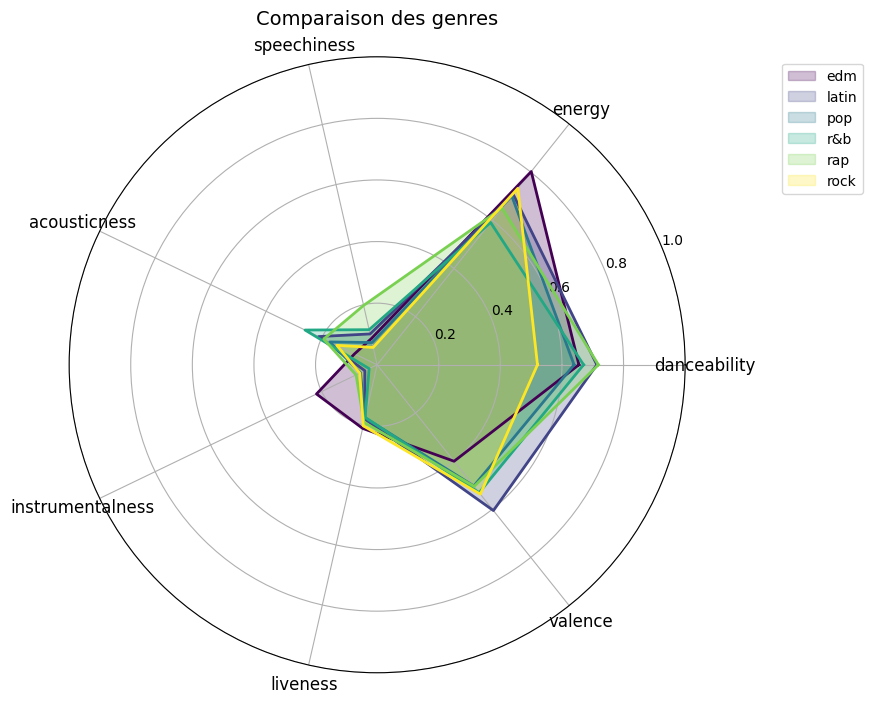

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Sélectionner les colonnes numériques pertinentes pour la visualisation
attributes = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Calculer la moyenne des caractéristiques par genre
genre_means = df.groupby('playlist_genre')[attributes].mean()

# Liste des genres disponibles
available_genres = genre_means.index.tolist()

# Sélectionner les genres à afficher (modifiable par l'utilisateur)
selected_genres = available_genres#['pop', 'rock', 'hip-hop']  # Exemple, adapte selon tes données

# Générer les couleurs pour chaque genre
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_genres)))

# Fonction pour générer un radar chart multi-genres
def radar_chart_multi(data, categories, selected_genres, colors):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Pour fermer le cercle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, genre in enumerate(selected_genres):
        genre_data = data.loc[genre].values.tolist()
        genre_data += genre_data[:1]  # Ajouter la première valeur pour fermer le cercle
        ax.fill(angles, genre_data, color=colors[i], alpha=0.25, label=genre)
        ax.plot(angles, genre_data, color=colors[i], linewidth=2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_ylim(0, 1)  # Échelle fixe pour comparaison
    ax.set_title('Comparaison des genres', size=14, color='black', va='bottom')

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

# Appliquer la fonction au sous-ensemble sélectionné
radar_chart_multi(genre_means, attributes, selected_genres, colors)


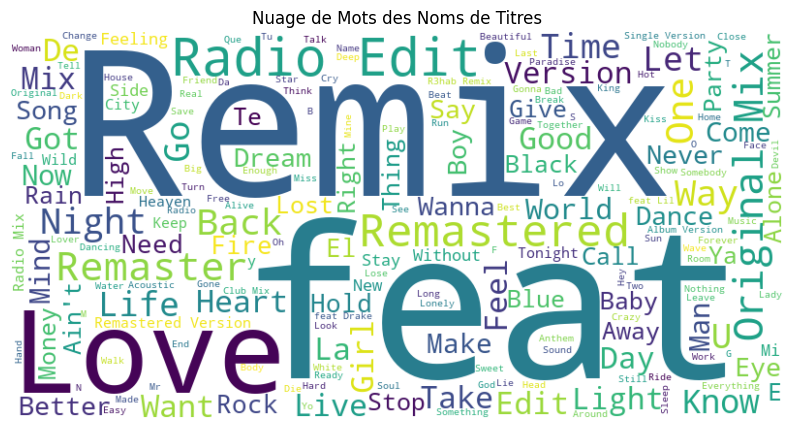

In [7]:
from wordcloud import WordCloud

# Créer un texte avec tous les noms de titres
text = " ".join(df['track_name'].dropna())

# Créer et afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots des Noms de Titres')
plt.show()


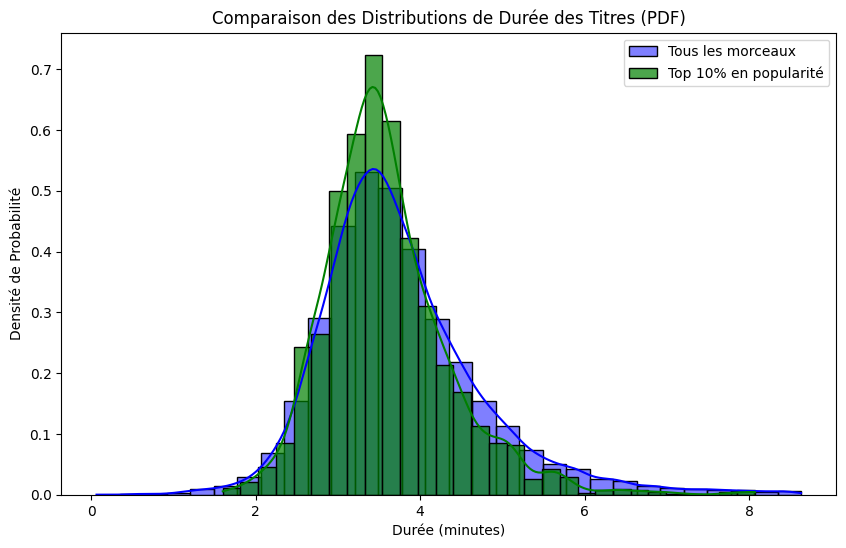

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcul du seuil du top 10% en popularité
top_10_threshold = df['track_popularity'].quantile(0.90)

# Filtrer les morceaux appartenant au top 10%
top_10_df = df[df['track_popularity'] >= top_10_threshold]

# Tracer les distributions en tant que densité de probabilité (PDF)
plt.figure(figsize=(10, 6))

sns.histplot(df['duration_minutes'], bins=30, kde=True, stat="density", color='blue', label='Tous les morceaux', alpha=0.5)
sns.histplot(top_10_df['duration_minutes'], bins=30, kde=True, stat="density", color='green', label='Top 10% en popularité', alpha=0.7)

plt.title('Comparaison des Distributions de Durée des Titres (PDF)')
plt.xlabel('Durée (minutes)')
plt.ylabel('Densité de Probabilité')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Compter le nombre de titres par artiste
artist_counts = df['track_artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Count']

# Créer un Treemap
fig = px.treemap(artist_counts, path=['Artist'], values='Count', color='Count', hover_data=['Artist'])
fig.update_layout(title='Répartition des Titres par Artiste')
fig.show()


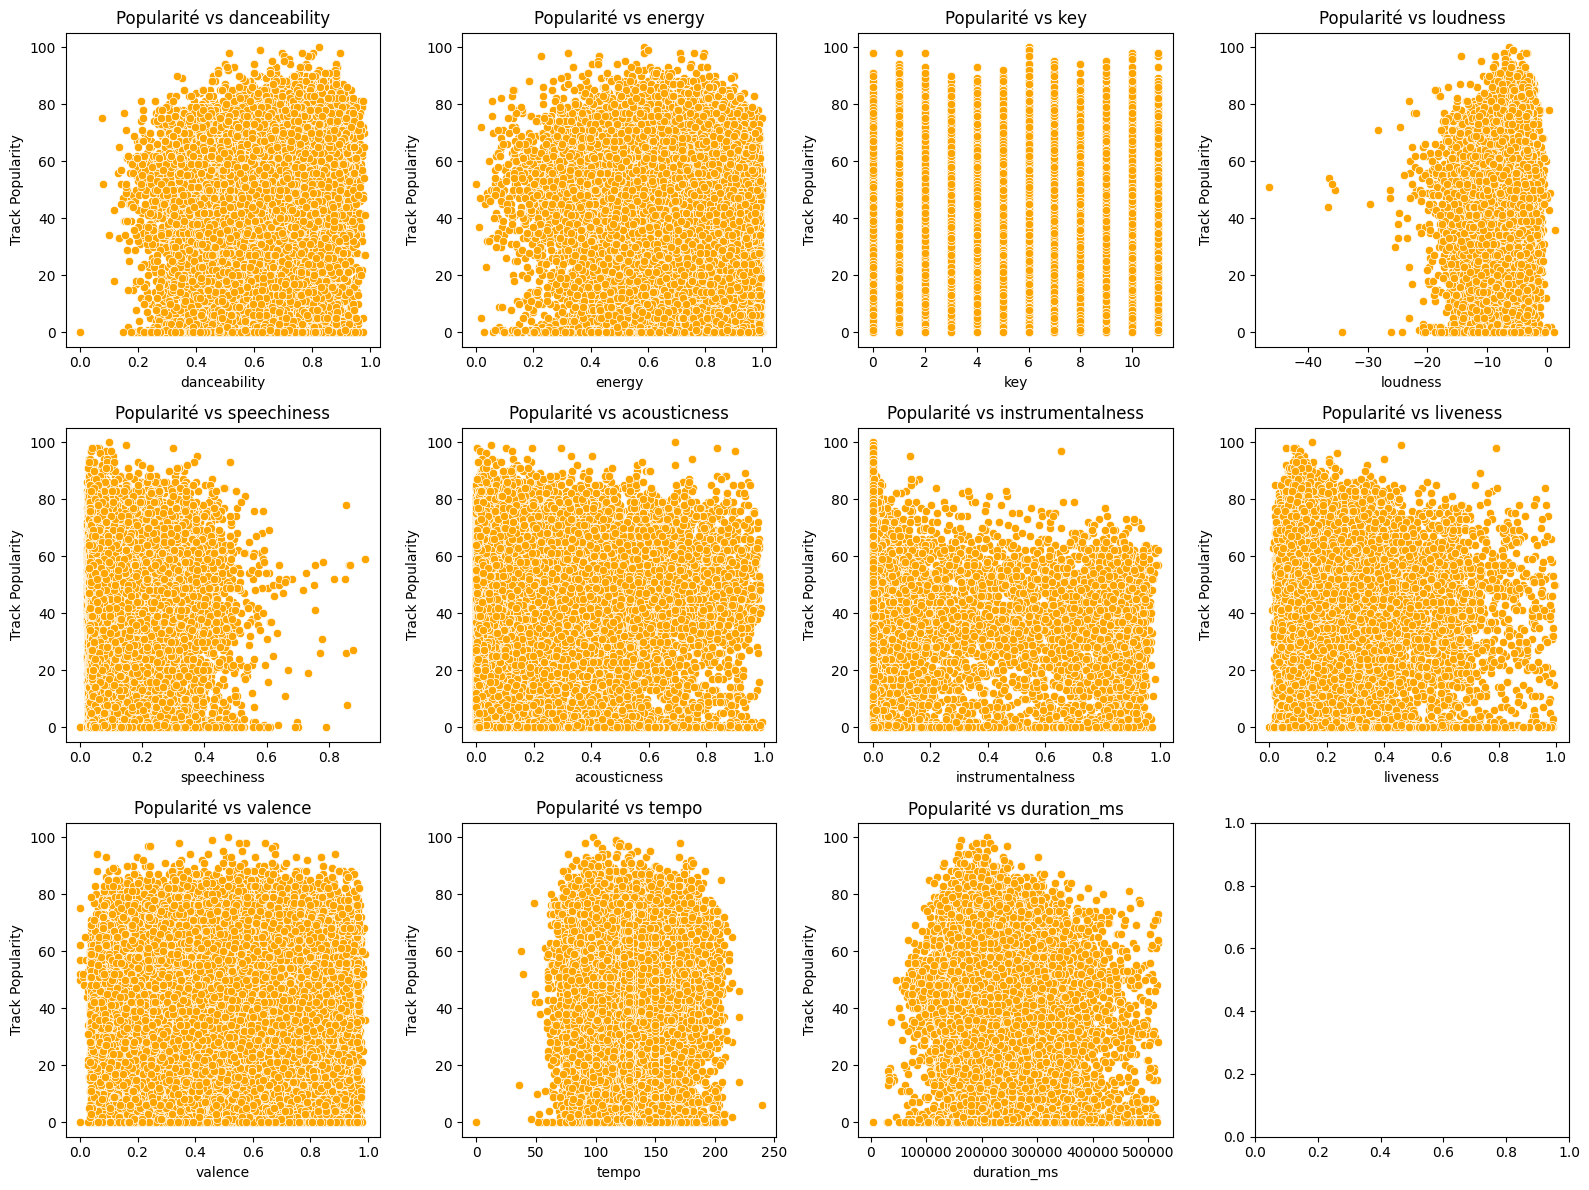

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables à comparer avec la popularité
variables_to_compare = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Créer une figure avec plusieurs subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))  # 3 lignes, 4 colonnes
axes = axes.flatten()  # Aplatir l'array pour accéder facilement à chaque axe

# Créer des scatter plots pour chaque variable
for i, var in enumerate(variables_to_compare):
    sns.scatterplot(x=df[var], y=df['track_popularity'], color='orange', ax=axes[i])
    axes[i].set_title(f'Popularité vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Track Popularity')

# Ajuster l'espace entre les subplots
plt.tight_layout()
plt.show()


c:\Users\maila\anaconda3\envs\INF8111\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maila\anaconda3\envs\INF8111\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maila\anaconda3\envs\INF8111\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\maila\anaconda3\envs\INF8111\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

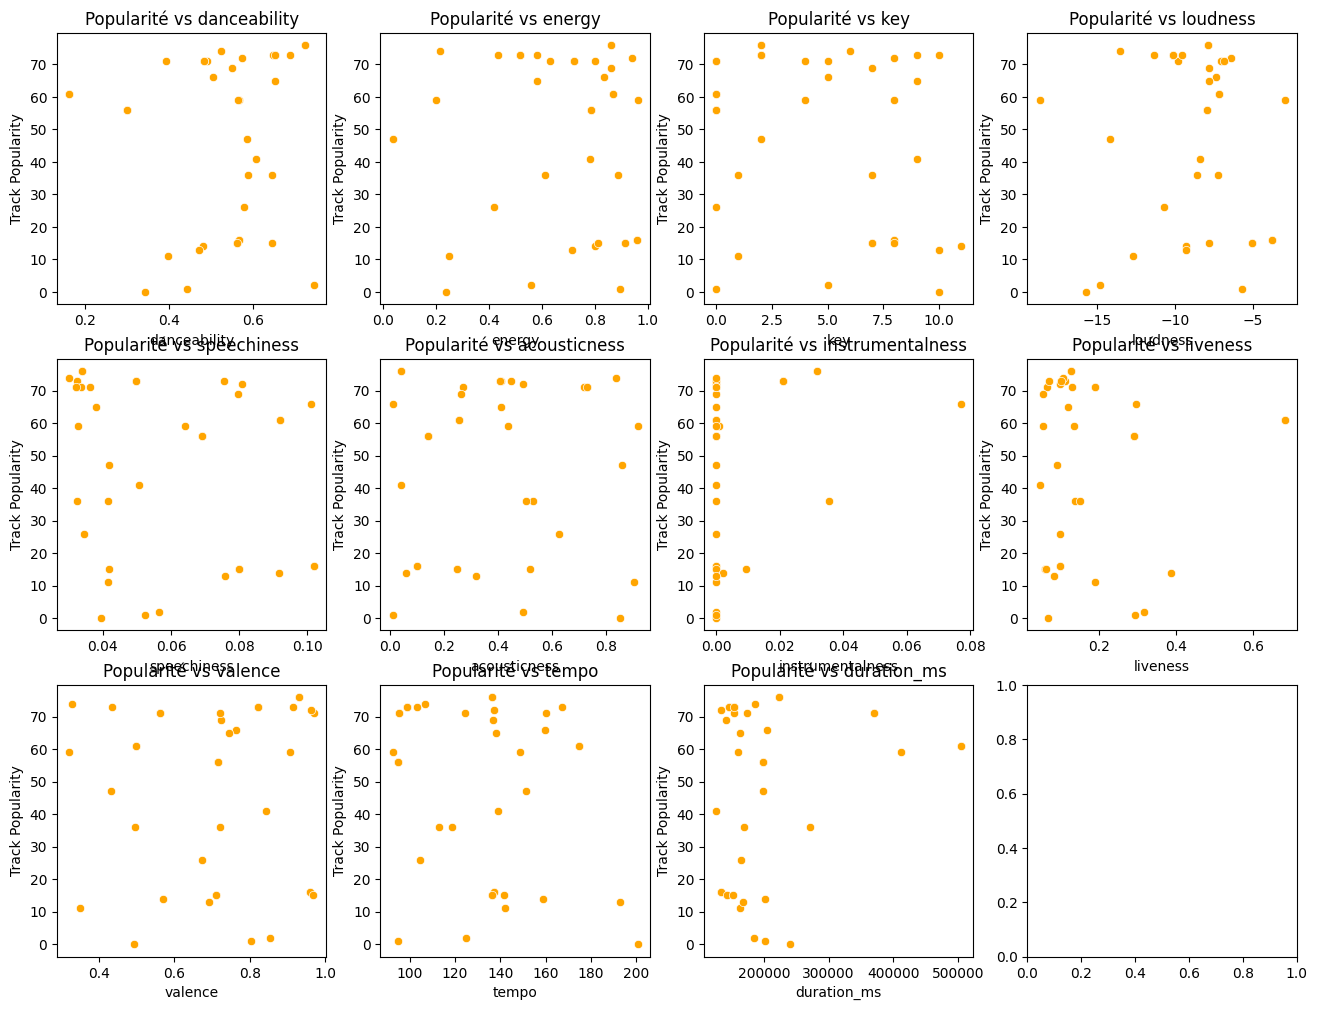

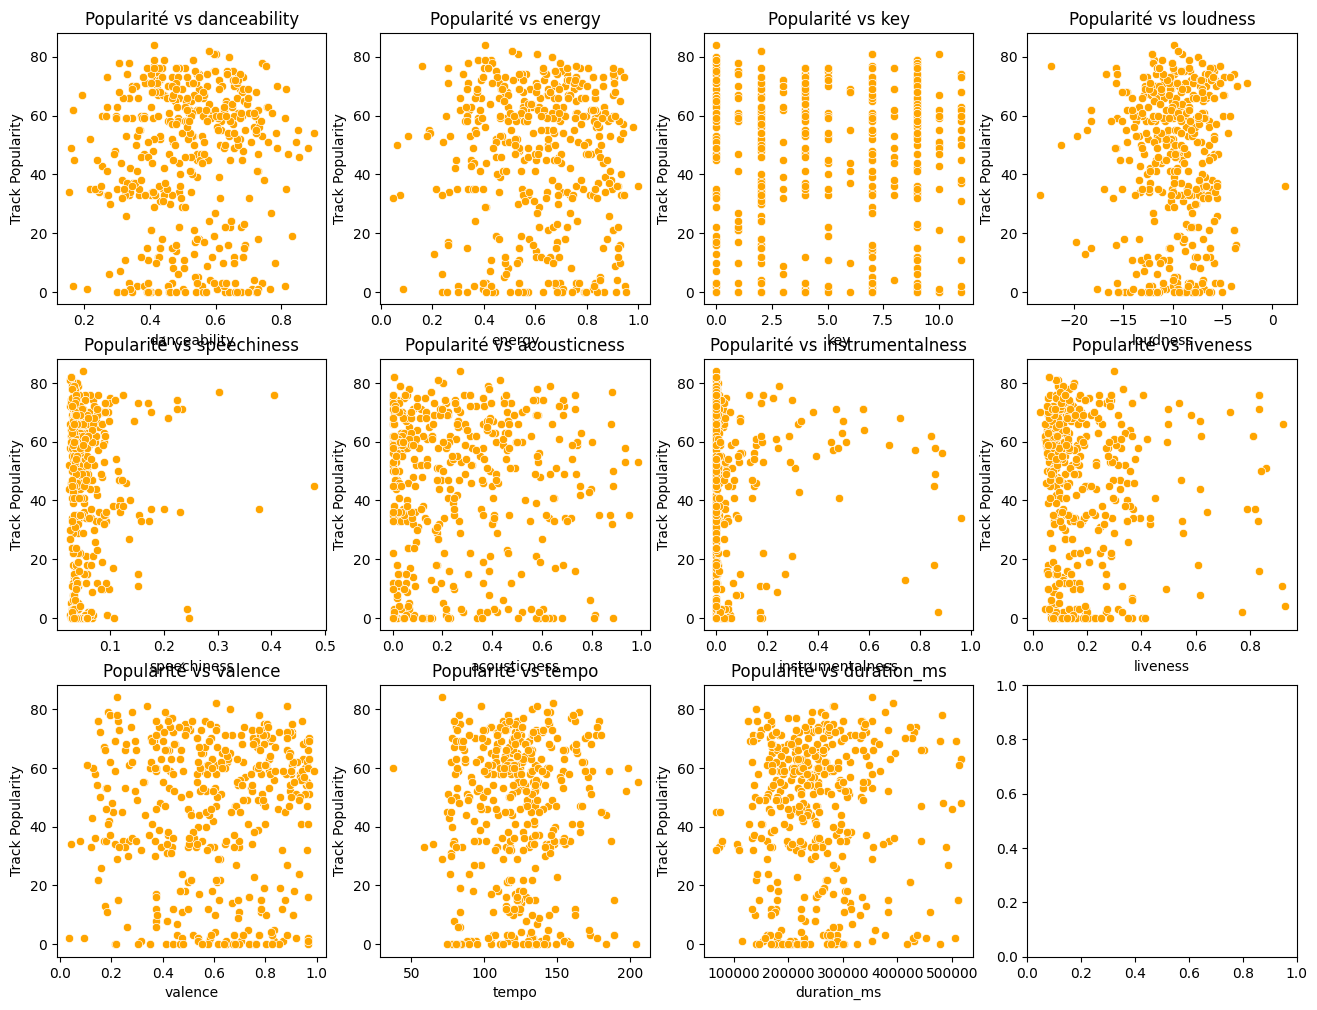

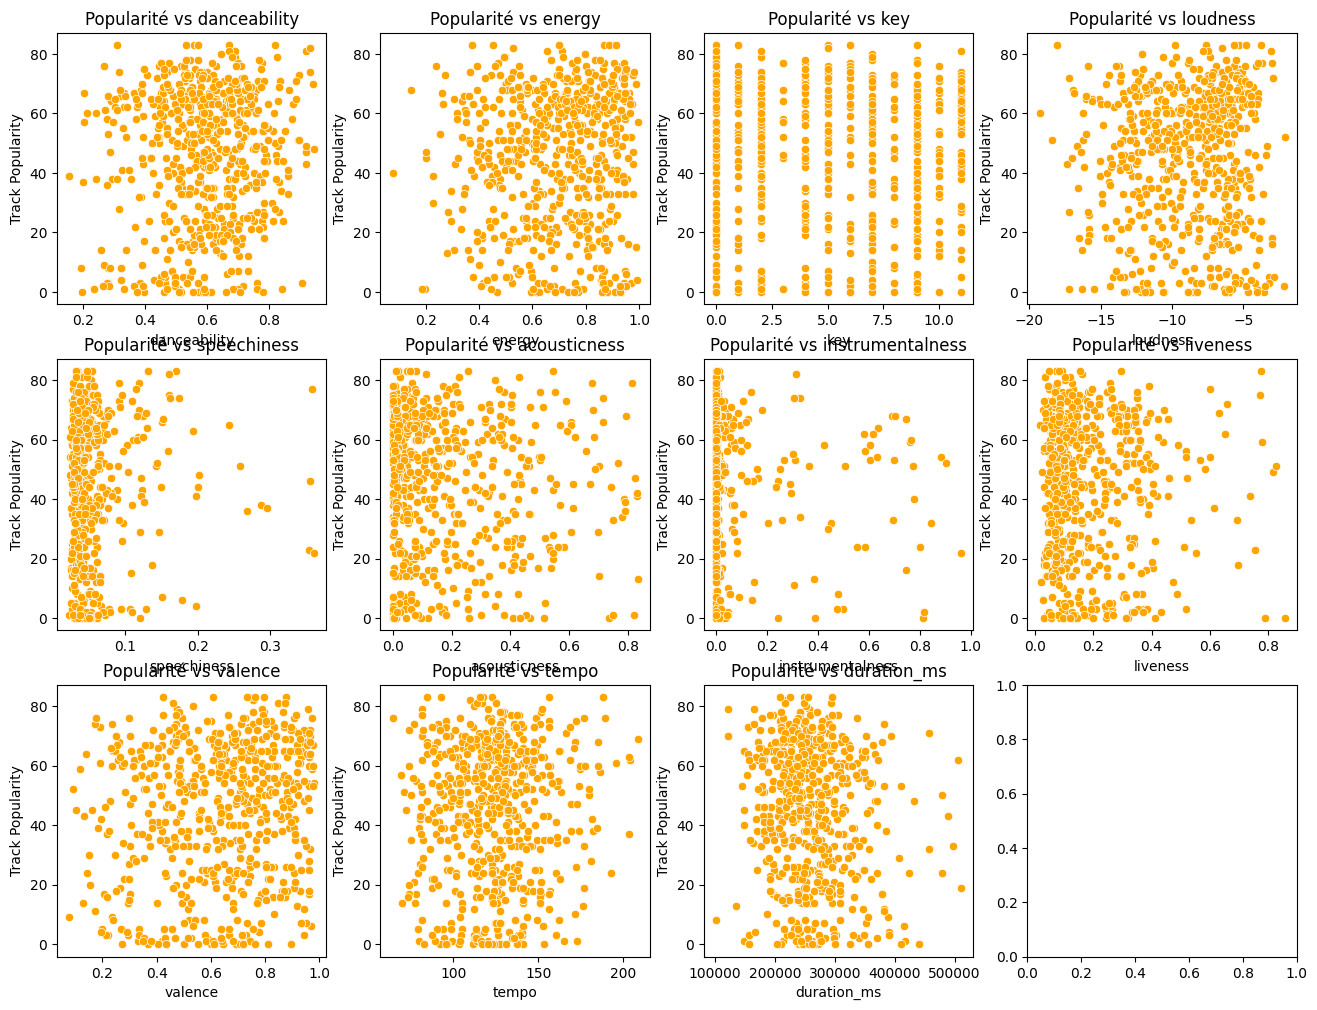

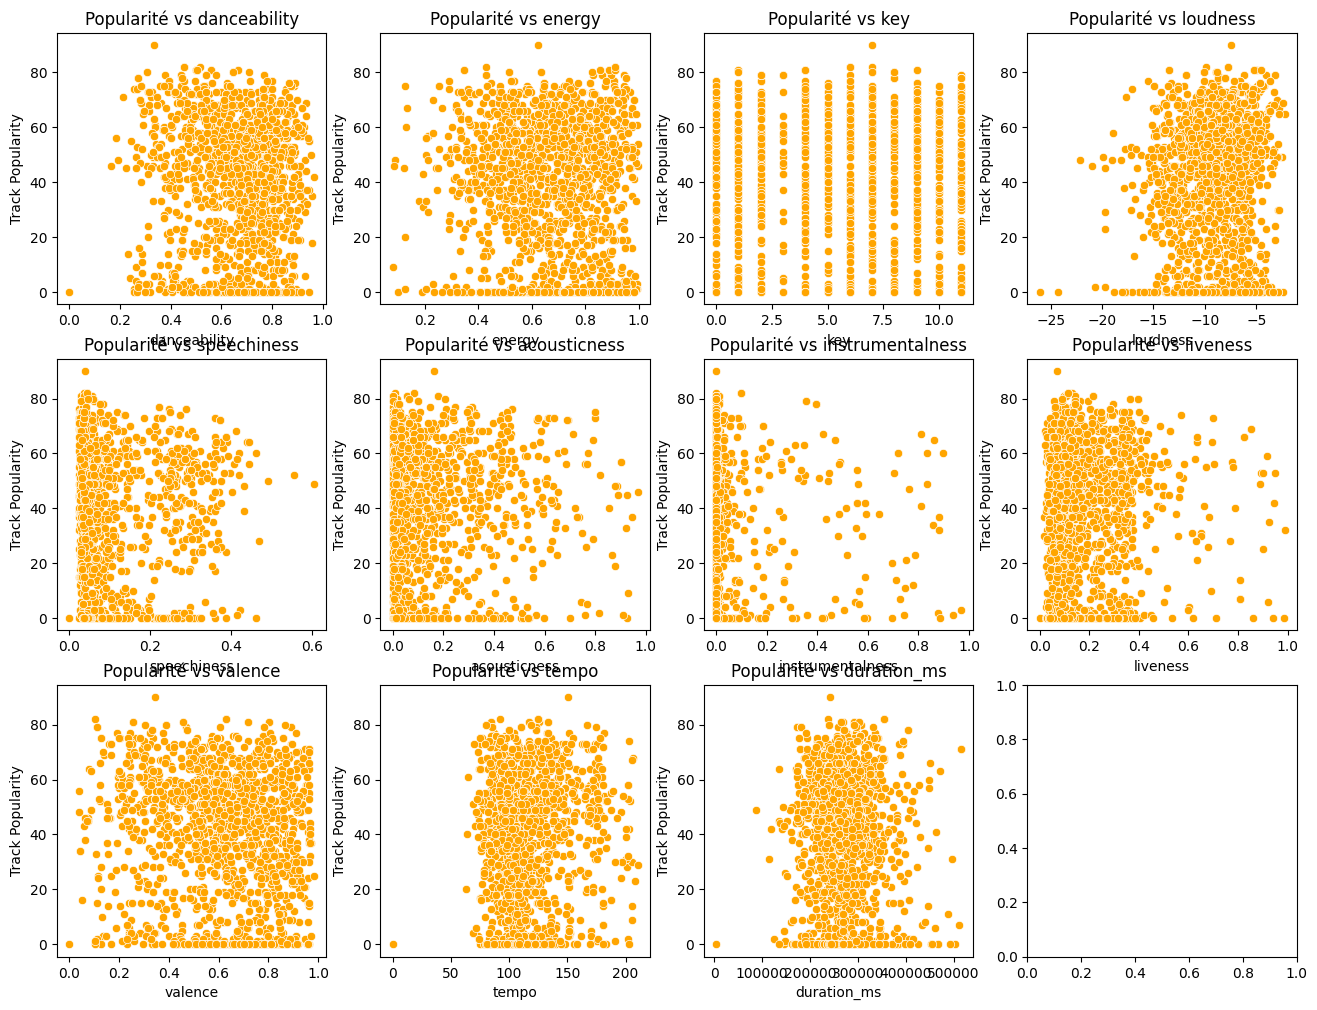

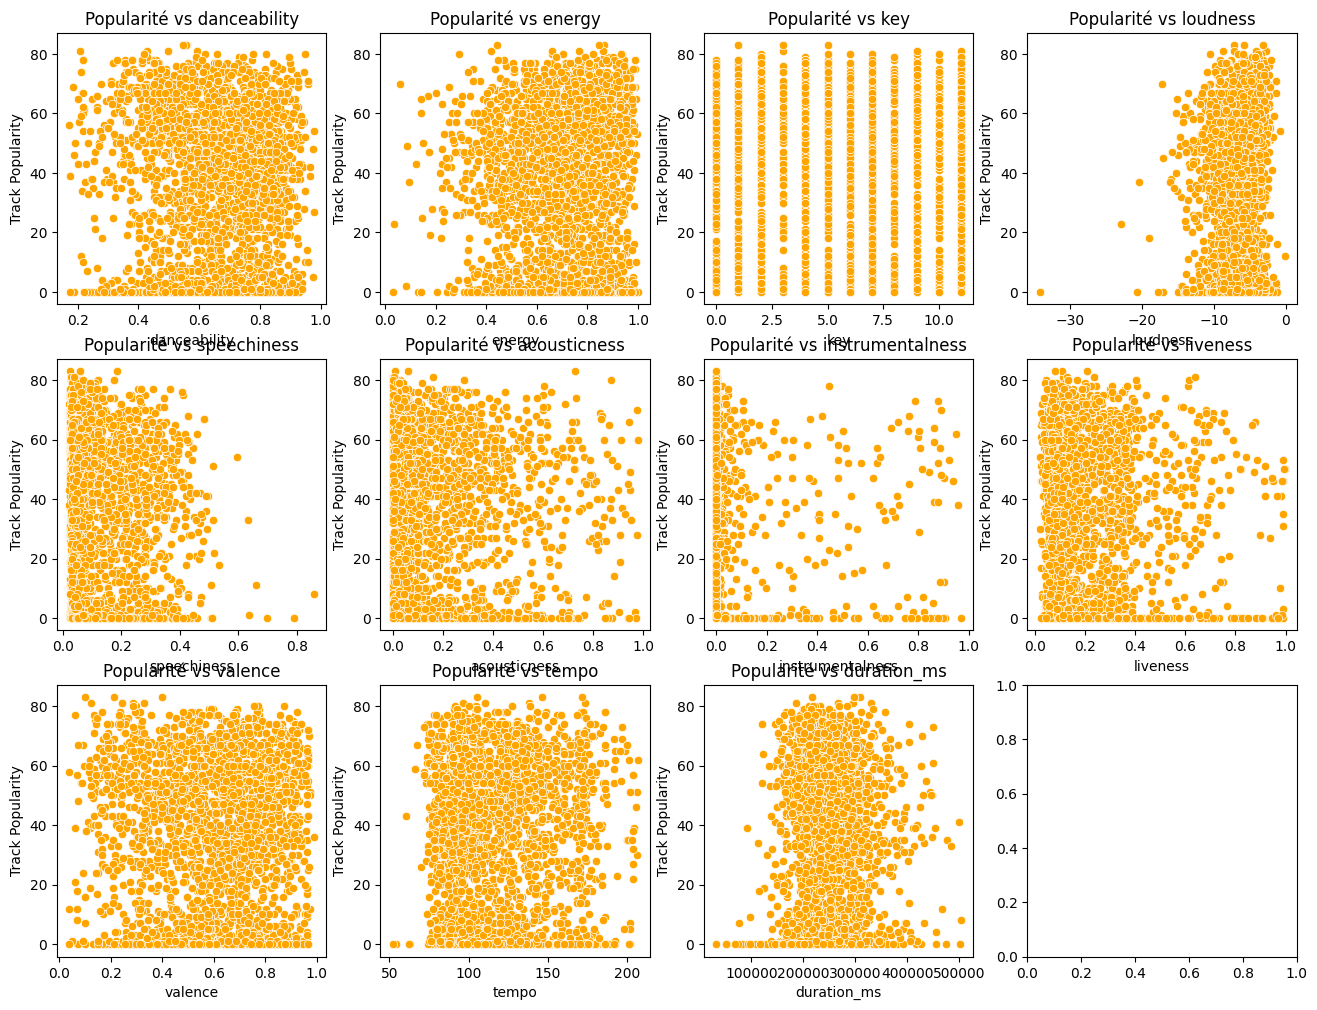

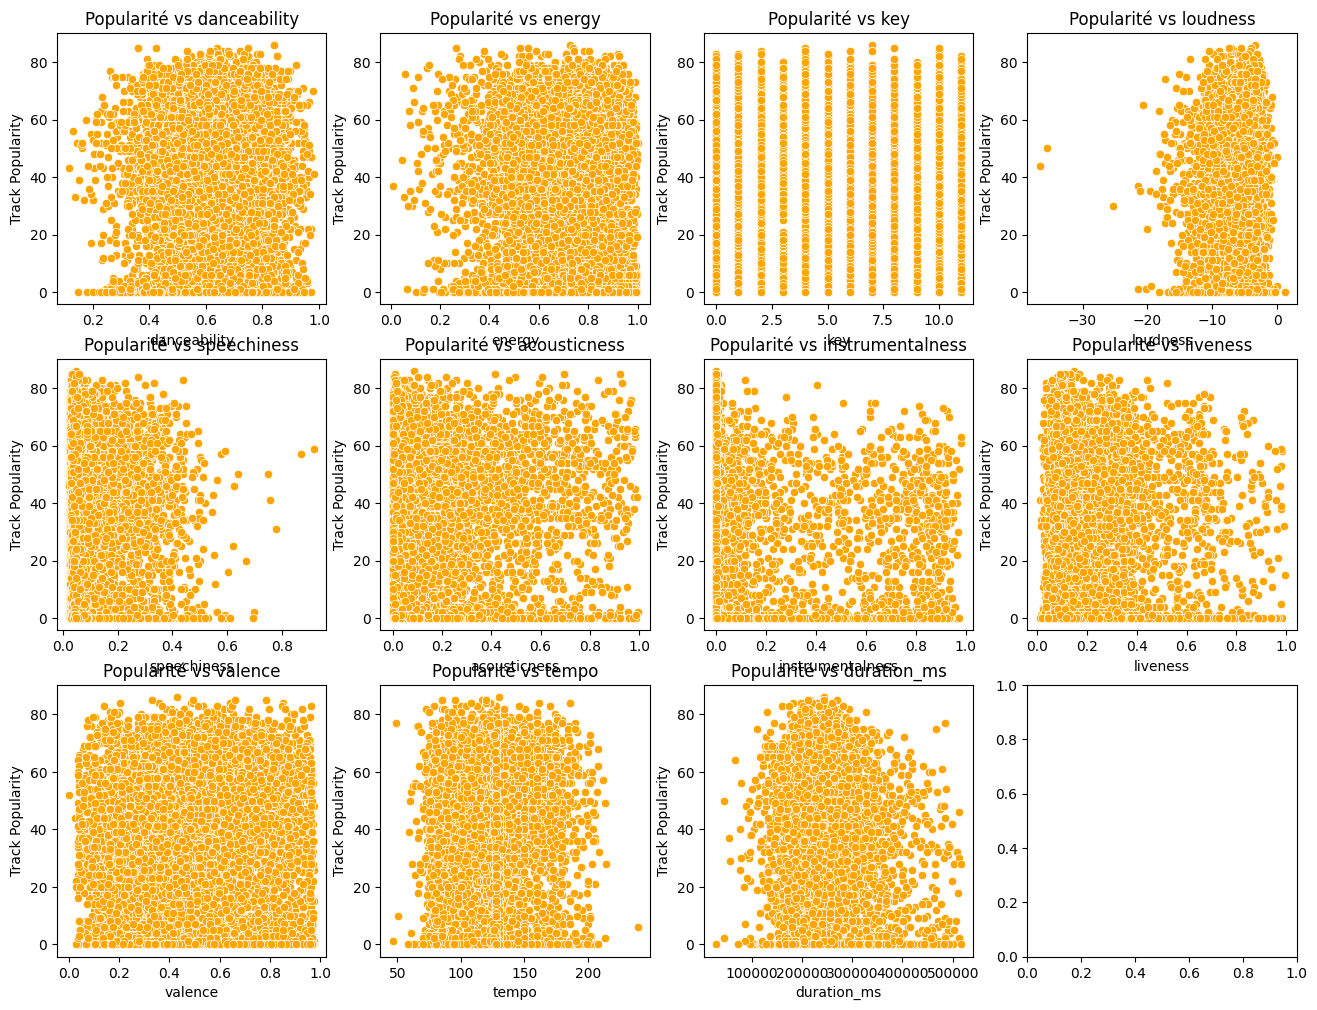

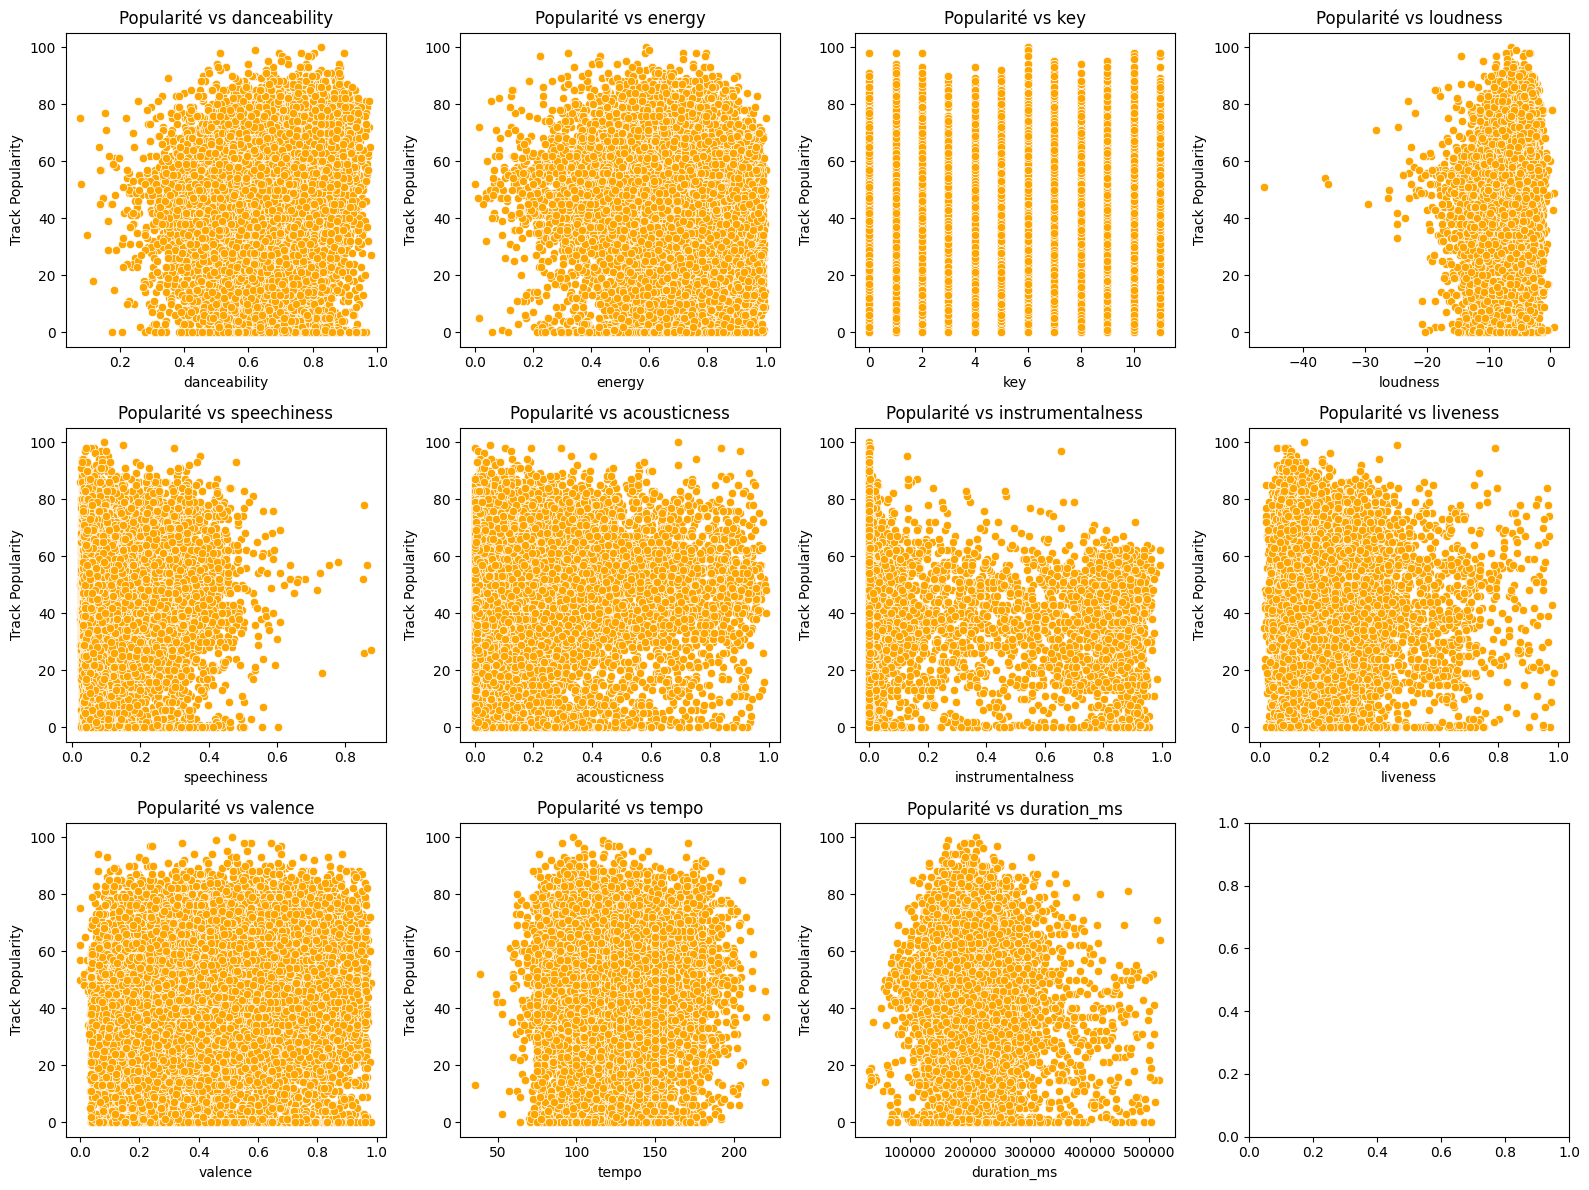

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables à comparer avec la popularité
variables_to_compare = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#Calculer la première date de sortie
first_release_date = df['track_album_release_date'].min()

for decade in range(first_release_date.year, 2021, 10):
    # Créer une figure avec plusieurs subplots
    x_decade = df[(df['track_album_release_date'].dt.year >= decade) & (df['track_album_release_date'].dt.year < decade + 10)]
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))  # 3 lignes, 4 colonnes
    axes = axes.flatten()  # Aplatir l'array pour accéder facilement à chaque axe

    # Créer des scatter plots pour chaque variable
    for i, var in enumerate(variables_to_compare):
        sns.scatterplot(x=x_decade[var], y=x_decade['track_popularity'], color='orange', ax=axes[i])
        axes[i].set_title(f'Popularité vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Track Popularity')

# Ajuster l'espace entre les subplots
plt.tight_layout()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sélectionner les variables indépendantes et la cible
X = df[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'valence']]  # Variables indépendantes
y = df['track_popularity']  # Variable cible

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients pour comprendre l'impact de chaque variable
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 590.7190072439199
              Coefficient
danceability     4.049294
energy         -36.415526
loudness         2.034763
acousticness     4.165408
tempo            0.018639
valence          5.500753


In [16]:
# Créer de nouvelles caractéristiques comme une combinaison de loudness et energy
df['intensity'] = df['loudness'] * df['energy']

# Vérifier la corrélation entre cette nouvelle caractéristique et la popularité
print(df[['intensity', 'track_popularity']].corr())


                  intensity  track_popularity
intensity          1.000000          0.157617
track_popularity   0.157617          1.000000


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Sélectionner les variables indépendantes et la cible
X = df[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'valence']]
y = df['track_popularity']

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Afficher l'importance des caractéristiques
importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print(importances)


              Importance
danceability    0.154092
energy          0.163286
loudness        0.181599
acousticness    0.168147
tempo           0.177206
valence         0.155670
